In [233]:
import pandas as pd 
import numpy as np 
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

In [170]:
with open('output/all_transf2424_label5_sche_mse/rolling2007-01-01/pred.pkl.test0','rb')as f: # 
    pred5=pickle.load(f)
pred5.columns = ['score5','label5']

In [234]:
with open('output/all_transf2424_label1_sche_mse1e-4/rolling2007-01-01/pred.pkl.test0','rb')as f: # 
    pred1=pickle.load(f)
pred1.columns = ['score1','label1']

In [235]:
# pred1.to_csv('all_transf2424_label1_sche_mse1e-4_pred.csv')

In [161]:
# hold 赔率
(pred1[pred1['label1']>0])['label1'].sum()/(pred1[pred1['label1']<0])['label1'].sum()

-1.0305766

In [162]:
# hold short 赔率
(pred1[pred1['label1']<0])['label1'].sum()/(pred1[pred1['label1']>0])['label1'].sum()

-0.9703306

In [13]:
# score 赔率
a = pred1[(pred1['score1']>0)&(pred1['label1']>0)]['label1'].sum()
b = pred1[(pred1['score1']>0)&(pred1['label1']<0)]['label1'].sum()
a/b 

-1.0751503

In [160]:
# hold 胜率
(pred1['label1']>0).sum()/pred1.shape[0], (pred1['label1']<0).sum()/pred1.shape[0],

(0.46619821354473784, 0.4974930996191561)

In [12]:
# score 胜率
((pred1['label1']>0 )&( pred1['score1']>0)).sum()/(pred1['score1']>0).sum()

0.46813190161045387

In [17]:
# score 赔率
a = top_800_stocks[(top_800_stocks['score1']>0)&(top_800_stocks['label1']>0)]['label1'].sum()
b = top_800_stocks[(top_800_stocks['score1']>0)&(top_800_stocks['label1']<0)]['label1'].sum()
a/b 

-1.0801089

In [16]:
# score 胜率
((top_800_stocks['label1']>0 )&( top_800_stocks['score1']>0)).sum()/(top_800_stocks['score1']>0).sum()

0.46879657712636535

In [15]:
# score看涨占比
( top_800_stocks['score1']>0).sum()/pred1.shape[0]

0.6861385082409782

In [1015]:
# pred1.groupby(level='datetime').apply(lambda x: x['label'+str(1)].corr(x['score'+str(1)], method='spearman')).mean()

-0.022323695017984025

In [1272]:
df001 = df_all[df_all['instrument']=='000001.SZ'].reset_index(drop=True)

In [1273]:
df001['score1']= df001['score1'] - df001['score1'].mean()

In [1274]:

def hold(df_all, labels):
    TIR_hold = 0
    TIR_hold_list = []
    for date in df_all['datetime'].drop_duplicates():
        a = df_all[df_all['datetime']==date]
        # a = pred1.loc[date].copy()
        # Rj = a[t] #a[t+N] / a[t] -1
        TIR_hold +=  np.sum(a[labels])
        TIR_hold_list.append(TIR_hold)
    return TIR_hold_list, TIR_hold
TIR_hold_list, TIR_hold = hold(df001,'label1')

TIR_hold

0.580753092638588

In [1275]:
df001['Ref'] = np.sign(df001['score1']) * df001['label1']
df001['holdTIR'] = df001['label1'].cumsum()
df001['modelTIR'] = df001['Ref'].cumsum()

In [1276]:
def mode_pre(df_all, scores, labels ):
    TIR_p = 0
    TIR_p_list = []
    for t in df_all['datetime'].drop_duplicates():
        a = df_all[df_all['datetime']==t]
            # a = pred1.loc[date].copy()
            # Rj = a[t] #a[t+N] / a[t] -1
        TIR_p +=  np.sum(np.sign(a[scores])* a[labels])
        TIR_p_list.append(TIR_p)
    return TIR_p_list, TIR_p
TIR_p_list, TIR_p = mode_pre(df001, 'score1', 'label1' )
TIR_p

-0.3050089628477508

Text(0.5, 1.0, '000001')

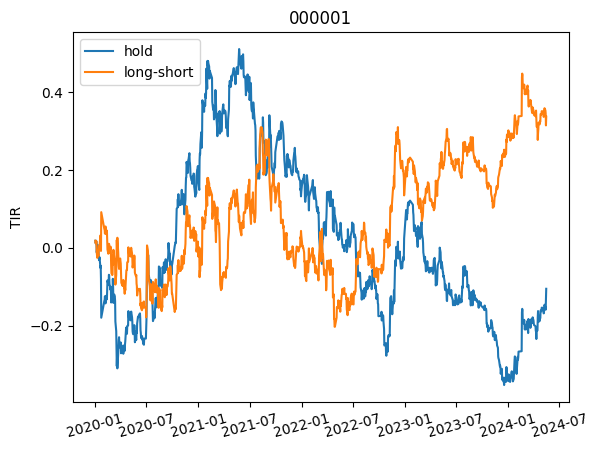

In [1217]:
xh = list(df001['datetime'].drop_duplicates())
# plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(xh,df001['holdTIR'],label='hold')
# plt.xticks(range(1,len(TIR_p_list),220))

# plt.plot(df001['datetime'],df001['TIR'],label='long')
# plt.plot(df001['datetime'],daily_scores_sum_low['TIR'],label='short')
plt.plot(df001['datetime'],df001['modelTIR'],label='long-short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('000001')
# mean, 标准化

Text(0.5, 1.0, '000012.SZ')

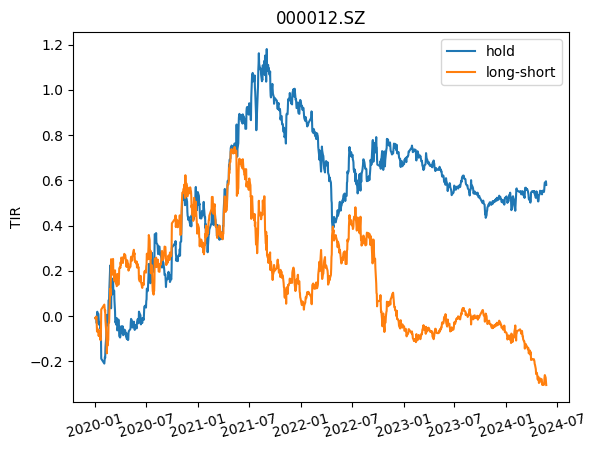

In [1277]:
xh = list(df001['datetime'].drop_duplicates())
# plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(xh,df001['holdTIR'],label='hold')
# plt.xticks(range(1,len(TIR_p_list),220))

# plt.plot(df001['datetime'],df001['TIR'],label='long')
# plt.plot(df001['datetime'],daily_scores_sum_low['TIR'],label='short')
plt.plot(df001['datetime'],df001['modelTIR'],label='long-short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('000012.SZ')
# mean, 标准化

In [172]:
# 时序不标准化
df_all =  pred1.reset_index() #pd.merge(pred1.reset_index(), pred5.reset_index()) # #  #

In [137]:
df_all['score01'] = (df_all['score5']>0).astype(int)

<Axes: >

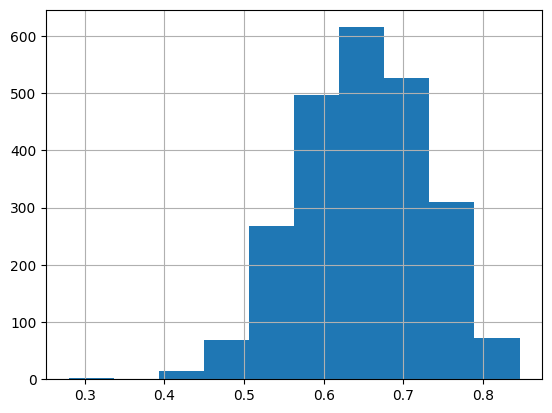

In [138]:
df_all.groupby(['instrument'])['score01'].mean().hist()

In [180]:
# 确保日期列是datetime类型，并按日期排序
df = pred1.copy()
# df['日期'] = pd.to_datetime(df['日期'])
# df = df.sort_values(by=['股票', '日期'])

days = 90
# 计算每个股票过去30天的滚动均值和标准差
df['rollingmean'] = df.groupby('instrument')['score1'].transform(lambda x: x.rolling(window=days, min_periods=1).mean())
df['rollingstd'] = df.groupby('instrument')['score1'].transform(lambda x: x.rolling(window=days, min_periods=1).std())
df = df.fillna(1) # 第一日出现的std为nan，填充为1

# 计算标准化得分
df['normscore'] = (df['score1'] - df['rollingmean']) / df['rollingstd']

# 缺失值填充
df.loc[df['normscore'].isna(),'normscore'] = df['score1'][df['normscore'].isna()] 


In [69]:
# score看涨占比
# ( df['normscore']>0).sum()/df.shape[0]

0.4900778151285915

In [130]:
# df_all= df_all.set_index(['instrument','datetime'])
# scores = 'score5'
# df_all[scores] = df_all.groupby(level='instrument',group_keys=False)[scores].apply(lambda x: (x- x.mean()))
# # 时序标准化

In [163]:
def cal_r(df, scores, labels, yuzhi,):
    df_all = df.reset_index()
    top_800_stocks = df.reset_index()
    low_800_stocks = df.reset_index()
    stocks_shaixuan = df.reset_index()
    stocks_shaixuan[scores] = df_all[scores].apply(lambda x: 0 if x < yuzhi and x> -yuzhi  else x)
    top_800_stocks[scores] = df_all[scores].apply(lambda x: 0 if x < yuzhi else x)
    low_800_stocks[scores] = df_all[scores].apply(lambda x: 0 if x > -yuzhi else x)
    top_800_stocks['Ref'] = np.sign(top_800_stocks[scores]) * top_800_stocks[labels]
    low_800_stocks['Ref'] = np.sign(low_800_stocks[scores]) * low_800_stocks[labels]
    # df_all['Ref'] = np.sign(df_all[scores]) * df_all[labels]
    
    kzzb = ( top_800_stocks[scores]>0).sum()/top_800_stocks.shape[0] # long score看涨占比
    kdzb = ( low_800_stocks[scores]<0).sum()/low_800_stocks.shape[0]
    
    long_revenue = np.sum(top_800_stocks.groupby(['datetime'])['Ref'].mean().sum())
    short_revenue =  np.sum(low_800_stocks.groupby(['datetime'])['Ref'].mean().sum()) 
    
    shenglv = ((top_800_stocks[labels]>0 )&( top_800_stocks[scores]>0)).sum()/(top_800_stocks[scores]>0).sum()
    # long score 赔率
    a = top_800_stocks[(top_800_stocks[scores]>0)&(top_800_stocks[labels]>0)][labels].sum()
    b = top_800_stocks[(top_800_stocks[scores]>0)&(top_800_stocks[labels]<0)][labels].sum()
    peilv = -a/b 
    
    shenglv_short = ((low_800_stocks[labels]<0 )&( low_800_stocks[scores]<0)).sum()/(low_800_stocks[scores]<0).sum()
    # short score 赔率
    c = low_800_stocks[(low_800_stocks[scores]<0)&(low_800_stocks[labels]<0)][labels].sum()
    d = low_800_stocks[(low_800_stocks[scores]<0)&(low_800_stocks[labels]>0)][labels].sum()
    peilv_short = -c/d
    
    stocks_shaixuan = stocks_shaixuan.set_index(['datetime','instrument'])
    huanshou = (stocks_shaixuan.groupby(['instrument'])[scores].shift(1) * stocks_shaixuan[scores] <0)
    huanshousum = huanshou.sum()
    huanshoumean  = huanshou.groupby(['instrument']).sum().mean()
    return kzzb, kdzb, ' ', long_revenue, short_revenue, long_revenue+short_revenue, ' ', shenglv, peilv,' ', shenglv_short,peilv_short,' ', huanshousum, huanshoumean

In [165]:
with open('acf.txt','a',encoding='utf-8') as f:
    for i in [0.0,0.0002,0.001,0.003,]:
        for j in cal_r(df_all,'score1','label1',i ):
            f.write(str(j)+'\t')
        f.write('\n')
    f.write('\n')


In [167]:
with open('acf.txt','a',encoding='utf-8') as f:
    for i in [0.0,0.1,0.3,0.5,0.7,0.9]:
        for j in cal_r(df,'normscore','label1',i ):
            f.write(str(j)+'\t')
        f.write('\n')
    f.write('\n')


In [105]:
(df_all.groupby(['instrument'])['normscore'].shift(1) * df_all['normscore'] <0).sum()

958152

In [109]:
(df.groupby(['instrument'])['normscore'].shift(1) * df['normscore'] <0).groupby(['instrument']).sum().mean()

403.60235888795285

In [224]:
df_all = df.reset_index()
scores = 'normscore' # 'score1'
labels = 'label1'
yuzhi = 0.3
top_800_stocks = df_all.copy()
low_800_stocks = df_all.copy()
stocks_shaixuan = df_all.copy()
stocks_shaixuan[scores] = df_all[scores].apply(lambda x: 0 if x < yuzhi and x> -yuzhi  else x)
top_800_stocks[scores] = df_all[scores].apply(lambda x: 0 if x < yuzhi else x)
low_800_stocks[scores] = df_all[scores].apply(lambda x: 0 if x > -yuzhi else x)
top_800_stocks['Ref'] = np.sign(top_800_stocks[scores]) * top_800_stocks[labels]
low_800_stocks['Ref'] = np.sign(low_800_stocks[scores]) * low_800_stocks[labels]
stocks_shaixuan['Ref'] = np.sign(stocks_shaixuan[scores]) * stocks_shaixuan[labels]

In [225]:
# 计算每个日期得分大于0的股票数量和总股票数量
grouped03 = stocks_shaixuan.groupby('datetime').apply(lambda x: (x['normscore'] > 0).sum() / len(x)).reset_index(name='positions')


In [228]:
grouped03.set_index(['datetime']).mean()

positions    0.346064
dtype: float64

In [223]:
grouped.set_index(['datetime']).mean()

positions    0.150194
dtype: float64

In [991]:
# top_800_stocks['score1'] = top_800_stocks.groupby(['datetime'],group_keys=False)['score1'].apply(lambda x: (x/ x.sum()))
# top_800_stocks['weight_return'] = top_800_stocks['score1']*top_800_stocks['label1'] 
# print(np.sum(top_800_stocks.groupby(['datetime'])['weight_return'].sum().sum())) # 加权

In [204]:
print(np.sum(top_800_stocks.groupby(['datetime'])['Ref'].mean().sum()),
      np.sum(low_800_stocks.groupby(['datetime'])['Ref'].mean().sum()),
      np.sum(stocks_shaixuan.groupby(['datetime'])['Ref'].mean().sum())
      )

0.5595930727942431 0.2777963542974121 0.8373894270916553


In [198]:
labels = 'label1'
def cal_cumsum_hold(top_800_stocks):
    daily_scores_sum = top_800_stocks.groupby('datetime')[labels].mean().reset_index()
    daily_scores_sum['TIR'] = daily_scores_sum[labels].cumsum()
    return daily_scores_sum
daily_scores_sum_hold = cal_cumsum_hold(df_all)

In [199]:
daily_scores_sum_hold.iloc[-1]

datetime    2024-05-22 00:00:00
label1                -0.021992
TIR                    0.322083
Name: 1060, dtype: object

In [200]:
# 计算得分的符号乘以标签的值
def cal_cumsum(top_800_stocks):
    daily_scores_sum = top_800_stocks.groupby('datetime')['Ref'].mean().reset_index() #sum？
    daily_scores_sum['TIR'] = daily_scores_sum['Ref'].cumsum()
    return daily_scores_sum

In [32]:
# def cal_cumsum0(top_800_stocks):
#     return top_800_stocks.groupby('datetime')['Ref'].mean().sum()
# df_all0 =  df_all.groupby('instrument').apply(cal_cumsum0)

In [ ]:
# def cal_cumsum_hold0(top_800_stocks):
#     daily_scores_sum = top_800_stocks.groupby('datetime')['label1'].mean().reset_index()
#     # daily_scores_sum['TIR'] = daily_scores_sum['label1'].cumsum()
#     return daily_scores_sum.groupby('datetime')['label1'].mean().sum()
# # daily_scores_sum_hold = cal_cumsum_hold(pred1.reset_index())
# df_all0_hold = df_all.groupby('instrument').apply(cal_cumsum_hold0)

In [35]:
# df_all01 = df_all0 - df_all0_hold

In [25]:
# df_all0 = df_all0.reset_index()

In [205]:
daily_scores_sum_top = cal_cumsum(top_800_stocks)
daily_scores_sum_low = cal_cumsum(low_800_stocks)
all_score = cal_cumsum(stocks_shaixuan)
# all_score = pd.merge(daily_scores_sum_top,daily_scores_sum_low,on='datetime',how='outer').fillna(0)
# all_score['all_score'] = (all_score['TIR_x'] + all_score['TIR_y'])/2

Text(0.5, 1.0, '90days')

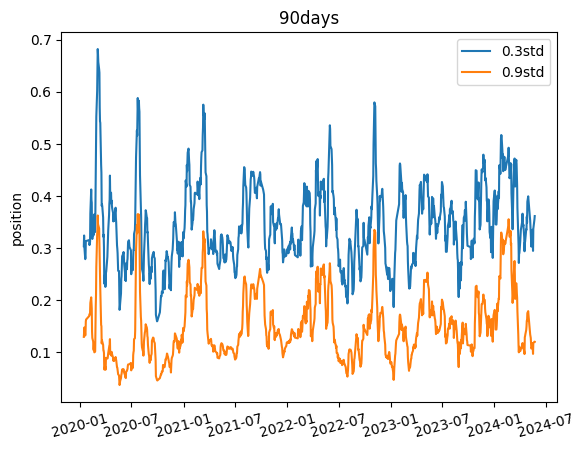

In [232]:
plt.plot(grouped03.set_index(['datetime']).rolling(window=10).mean(),label='0.3std')
plt.plot(grouped.set_index(['datetime']).rolling(window=10).mean() ,label='0.9std')

plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('position')
plt.title('90days')

Text(0.5, 1.0, '90day 0.9std')

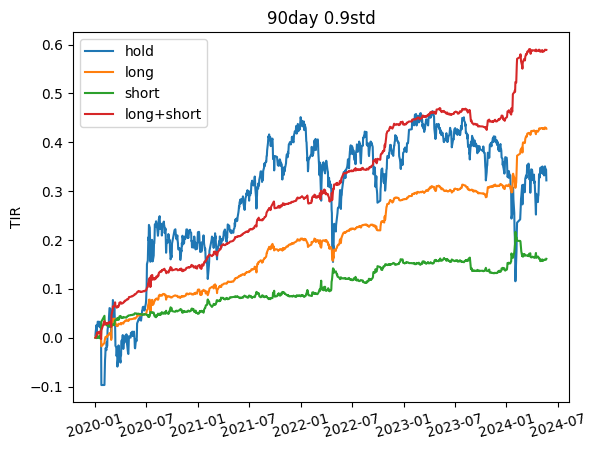

In [202]:

# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

# plt.plot(xh,daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('90day 0.9std')
# mean, 不标准化

Text(0.5, 1.0, '90day 0.3std')

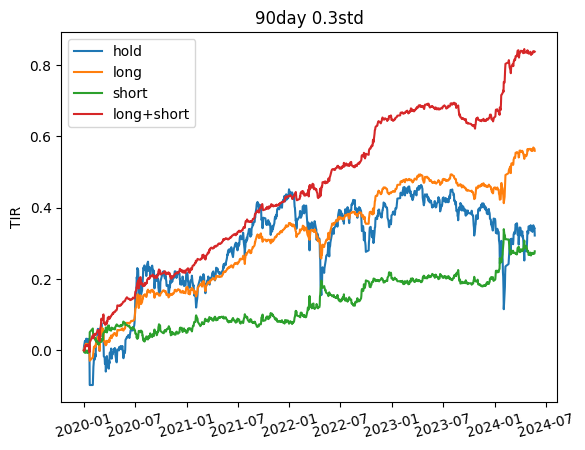

In [206]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

# plt.plot(xh,daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('90day 0.3std')
# mean, 不标准化

Text(0.5, 1.0, 'label5')

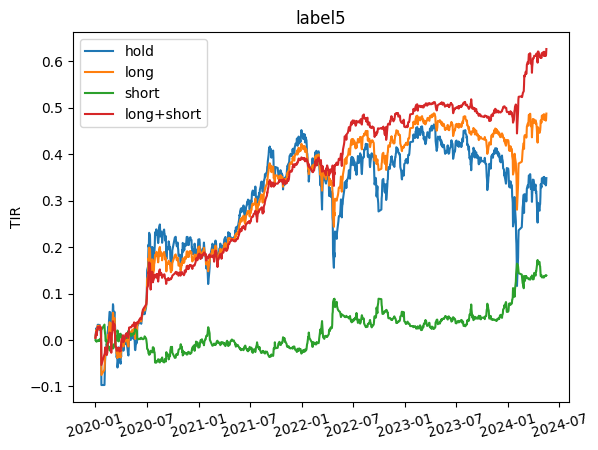

In [98]:

# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

# plt.plot(xh,daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('label5')
# mean, 不标准化

Text(0.5, 1.0, 'label5')

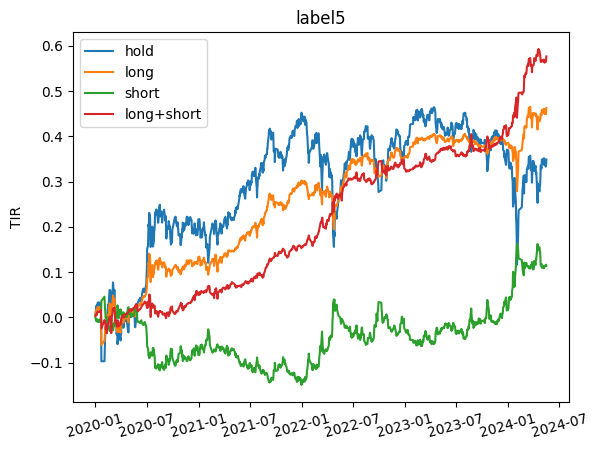

In [104]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

# plt.plot(xh,daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('label5')
# mean, 标准化

Text(0.5, 1.0, 'label1')

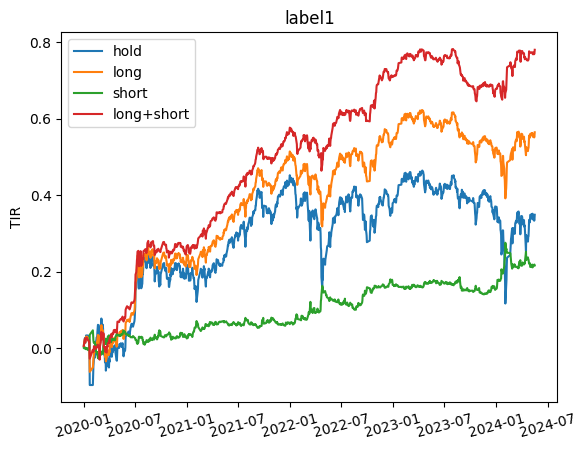

In [128]:
xh = list(pred1.reset_index()['datetime'].drop_duplicates())

# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('label1')
# mean, 不标准化

Text(0.5, 1.0, 'all')

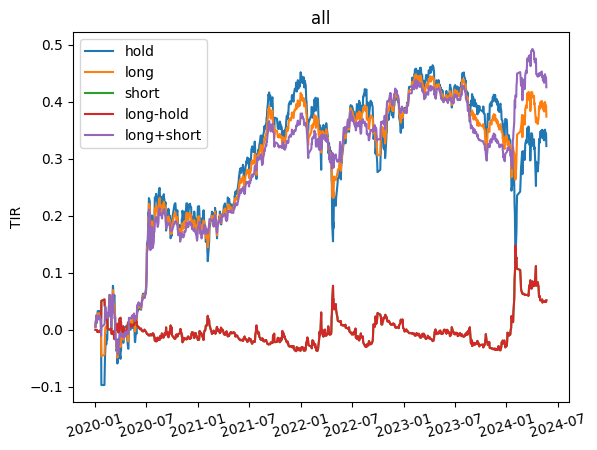

In [11]:
xh = list(pred1.reset_index()['datetime'].drop_duplicates())

# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(xh,daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

plt.plot(xh,daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('label1')
# mean, 不标准化

Text(0.5, 1.0, 'all')

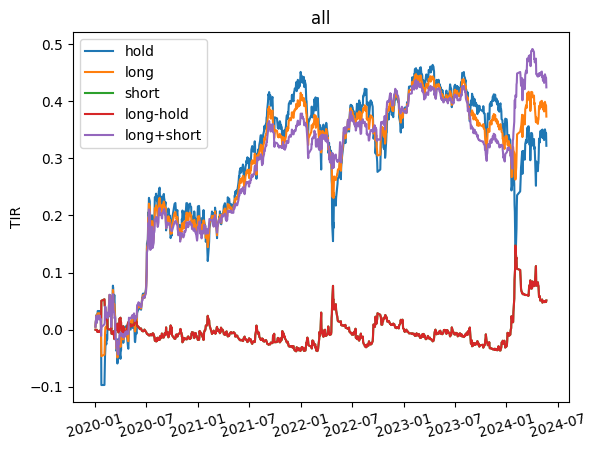

In [20]:
xh = list(pred1.reset_index()['datetime'].drop_duplicates())

plt.plot(xh,daily_scores_sum_hold['TIR'],label='hold')

plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

plt.plot(xh,daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('label1')
# mean, 标准化

Text(0.5, 1.0, 'all')

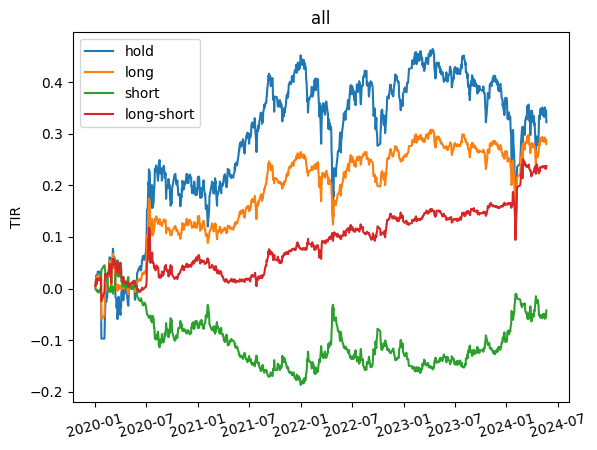

In [1097]:
xh = list(pred1.reset_index()['datetime'].drop_duplicates())
# plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(xh,daily_scores_sum_hold['TIR'],label='hold')
# plt.xticks(range(1,len(TIR_p_list),220))

plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')
plt.plot(all_score['datetime'],all_score['TIR'],label='long-short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('all')
# mean, 标准化

In [1135]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# 假设已经定义好模型和数据加载器
model = ...  # 你的模型定义
criterion = nn.CrossEntropyLoss()  # 假设使用交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 定义学习率调度器
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        inputs, targets = batch['input'], batch['target']
        
        optimizer.zero_grad()  # 清空梯度
        outputs = model(inputs)  # 前向传播
        loss = criterion(outputs, targets)  # 计算损失
        loss.backward()  # 反向传播，计算梯度
        optimizer.step()  # 更新模型参数
    
    # 验证模型
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs, targets = batch['input'], batch['target']
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)  # 计算平均验证损失
    
    # 使用调度器调整学习率
    scheduler.step(val_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')


In [1134]:
crossentropyloss = nn.CrossEntropyLoss()

In [1142]:
torch.randn(5,1)

tensor([[ 1.0184e+00],
        [-2.0897e-05],
        [ 8.7117e-01],
        [ 5.4246e-01],
        [ 1.3135e+00]])

In [1146]:
crossentropyloss(torch.randn(1,5),torch.randn(1,5))

tensor(3.3317)

In [1145]:
torch.unsqueeze(torch.randn(5),0)

tensor([[-0.5008, -0.9161,  0.2162, -0.6229, -0.6573]])